<a href= "https://www.kaggle.com/mnassrib/telecom-churn-datasets">Orange Telecom Churn Dataset (Link to dataset)</a>

<h4>Objective</h4>
To predict if a customer will churn from Orange Telecom Company.

<h5>Evaluation Metric</h5>
F1 Score

<b>Variable Definitions</b><br>
<ul>
    <li>State: State customer is located</li>
    <li>Account length: Customer account length in days</li>
    <li>Area code: Area code of customer's location</li>
    <li>Phone number: Customer Phonenumber</li>
    <li>International plan: Does customer have International plan (Yes or No)</li>
    <li>Voicemail plan: Customer has voice mail plan (Yes or No)</li>
    <li>Number vmail messages: Customer number of voice mail messages</li>
    <li>Total day minutes: Total Call time in the daytime</li>
    <li>Total day calls: Total calls in daytime</li>
    <li>Total day charge: Total charges for calls in daytime</li>
    <li>Total eve minutes: Total Call time in the evening </li>
    <li>Total eve calls: Total calls in the evening</li>
    <li>Total eve charge: Total charges for calls in the evening</li>
    <li>Total night minutes: Total Call time at night</li>
    <li>Total night calls: Total calls at night</li>
    <li>Total night charge: Total charges for calls at night</li>
    <li>Total intl minutes: Total intl call time</li>
    <li>Total intl calls: Total Intl calls</li>
    <li>Total intl charge: Total Intl call charges</li>
    <li>Customer service calls: Customer customer service calls</li>
    <li>Churn: Target- Whether customer churned or not(True or False)</li>
</ul>

In [1]:
path = "C:/Machine_learning_datafiles/kaggle"

In [2]:
import os, gc, warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as scipy_stats

In [4]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
seed = 42
random.seed(seed)
np.random.seed(seed)

In [7]:
plt.style.use('bmh')
%matplotlib inline
pd.set_option('display.max_columns', 70)

In [8]:
data= pd.read_csv(path+'./OrangeTelecomCustomerChurn.csv')

In [9]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
data.shape

(3333, 21)

In [11]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [12]:
data.isna().any().sum()
#No Missing Values

0

In [13]:
#renaming the variables
data.columns = data.columns.str.replace('\s', '_')

In [14]:
data.nunique()

state                       51
account_length             212
area_code                    3
phone_number              3333
international_plan           2
voice_mail_plan              2
number_vmail_messages       46
total_day_minutes         1667
total_day_calls            119
total_day_charge          1667
total_eve_minutes         1611
total_eve_calls            123
total_eve_charge          1440
total_night_minutes       1591
total_night_calls          120
total_night_charge         933
total_intl_minutes         162
total_intl_calls            21
total_intl_charge          162
customer_service_calls      10
churn                        2
dtype: int64

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area_code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [16]:
state_churn_rate = data.groupby('state').churn.mean().sort_values(ascending=False)

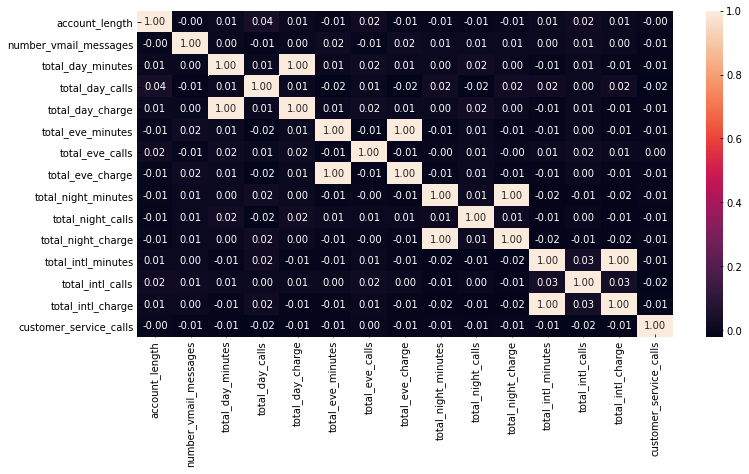

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(data.select_dtypes('number').drop('area_code', 1).corr(), annot=True, fmt='.2f');

In [18]:
data[['international_plan', 'voice_mail_plan']] = data[['international_plan', 'voice_mail_plan']].apply(
    lambda x: [0 if i == 'no' else 1 for i in x])

In [19]:
drop_cols = ['phone_number', 'total_day_minutes', 'total_eve_minutes', 
             'total_night_minutes', 'total_intl_minutes'] #columns to drop

**Correlation Matrix**

In [20]:
corr = data.drop(drop_cols, 1).corr('spearman')

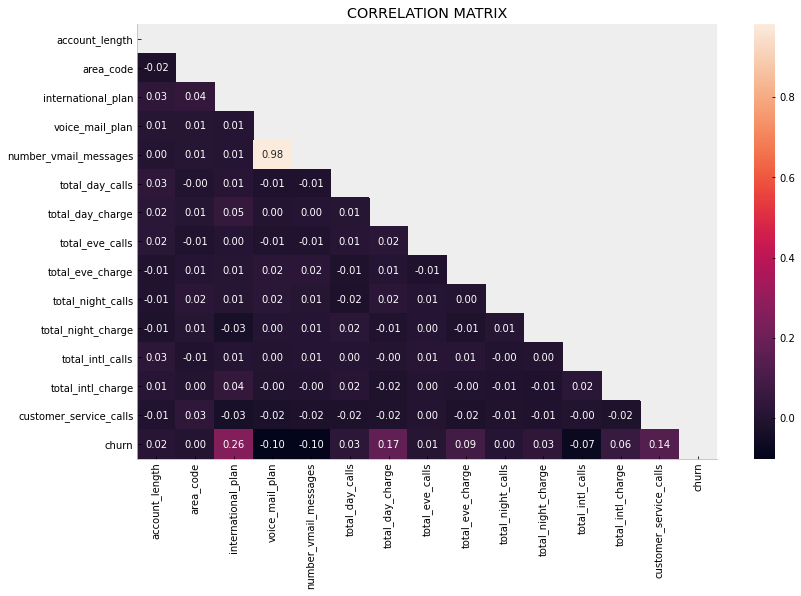

In [21]:
plt.figure(figsize=(13,8))
sns.heatmap(corr, mask=np.triu(corr), fmt='.2f', annot=True)
sns.despine()
plt.title('CORRELATION MATRIX');

There's a strong relationship b/w the number of voicemail messages and if the customer has a voicemail plan or not

**Categorical Encoding**

Because of the high cardinality of the states, I'll represent each state by their churn rates.

In [22]:
def DataTypes(data, type_str='linear'):
    """Creates Data based on the type of model to use- Linear or non-linear model
    :params type_str: Model type
    :returns Data
    """
    cat_cols = ['area_code']
    data_copy = data.copy()
    
    if type_str == 'linear':
        data_copy.state = data.state.map(state_churn_rate)
        data_copy = pd.get_dummies(data_copy, columns=cat_cols, drop_first=True)
        data_copy.churn = data_copy['churn'] * 1
    elif type_str == 'non-linear':
        data_copy.state = data.state.factorize(sort=True)[0]
        data_copy = pd.get_dummies(data_copy, columns=cat_cols, drop_first=False)
        data_copy.churn = data_copy['churn'] * 1
    return data_copy

In [23]:
lin_data = DataTypes(data)
non_lin_data = DataTypes(data, 'non-linear')

**Modelling**

In [24]:
lin_data.shape, non_lin_data.shape

((3333, 22), (3333, 23))

In [25]:
lin_data = lin_data.sample(frac=1, random_state=seed) #shuffling data
non_lin_data = non_lin_data.sample(frac=1, random_state=seed)

In [26]:
X_lin = lin_data.drop(drop_cols+['churn'], 1)
X = non_lin_data.drop(drop_cols+['churn'], 1)
y = lin_data.churn

In [27]:
X.shape, X_lin.shape, len(drop_cols)

((3333, 17), (3333, 16), 5)

In [28]:
xtrain_lin, xtest_lin, ytrain_lin, ytest_lin = train_test_split(X_lin, y, test_size=0.25, random_state=seed, stratify=y)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=seed, stratify=y)

In [29]:
xtrain.shape, xtest.shape, xtrain_lin.shape, xtest_lin.shape

((2499, 17), (834, 17), (2499, 16), (834, 16))

In [30]:
print(ytrain.value_counts())
print(ytest.value_counts())

0    2137
1     362
Name: churn, dtype: int64
0    713
1    121
Name: churn, dtype: int64


In [31]:
scale = ['account_length', 'number_vmail_messages', 'total_day_calls', 'total_day_charge', 'total_eve_calls', 'total_eve_charge', 
         'total_night_calls', 'total_night_charge', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

dont_scale = [col for col in X_lin.columns if col not in scale]

In [32]:
scaler = StandardScaler()
transformer = ColumnTransformer(transformers=[
    ('scale', scaler, scale),
    ('dont_scale', 'passthrough', dont_scale)
], n_jobs=-1, remainder='passthrough')

In [111]:
def metricScores(model, x, y):
    f_score = f1_score(y, model.predict(x))
    auc_score = roc_auc_score(y, model.predict_proba(x)[:,1])
    recall = recall_score(y, model.predict(x))
    precision = precision_score(y, model.predict(x))
    return f_score, auc_score, recall, precision

def printReport(model, x, y):
    print(classification_report(y, model.predict(x),target_names=['Churn_No', 'Churn_Yes']))

def plotFigure(model, x, y, title):
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    plot_confusion_matrix(model, x, y, display_labels=['Churn_No', 'Churn_Yes'], 
                          ax=ax[0])
    plot_roc_curve(model, x, y, ax=ax[1],name=title)
    ax[0].grid(False)
    plt.tight_layout(pad=1.)

In [34]:
def featureImportance(model, x, y):
    if hasattr(model, 'named_steps'):
        if 'logreg' in model.named_steps.keys():
            imp = pd.Series(model.named_steps['logreg'].coef_.ravel(), index=x.columns).sort_values()
            imp.plot.barh(title=model.named_steps['logreg'].__class__.__name__)
    else:
        imp= pd.Series(model.feature_importances_, index=x.columns).sort_values()
        imp.plot.barh(title=model.__class__.__name__)

In [35]:
def crossValScores(model, xtr, ytr, cv=5):
    cvs= cross_val_score(model, xtr, ytr, cv=cv, scoring='f1', n_jobs=-1)
    print('Mean F1 Score: {:.3f} +- {:.3f}'.format(cvs.mean(), cvs.std()))

In [36]:
logreg = LogisticRegression(max_iter=500, random_state=seed, class_weight='balanced', solver='liblinear')
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=3, min_samples_split=3, random_state=seed, 
                            criterion='entropy', class_weight='balanced')
gbm = GradientBoostingClassifier(n_estimators=200, random_state=seed, max_features=0.3)

In [37]:
logreg_pl = Pipeline([('transformer', transformer), ('logreg', logreg)])

**Cross validation**<br>
Because the dataset is small I'll be using the sklearn's cross val score which splits a dataset into training and validation sets and stores the evaluation scores at each crossvalidation fold

In [38]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [39]:
crossValScores(logreg_pl, xtrain_lin, ytrain_lin, skfold)

Mean F1 Score: 0.495 +- 0.044


In [40]:
crossValScores(rf, xtrain, ytrain, skfold)

Mean F1 Score: 0.798 +- 0.047


In [41]:
crossValScores(gbm, xtrain, ytrain, skfold)

Mean F1 Score: 0.771 +- 0.063


<hr>

**HyperParameter Tuning**

In [42]:
def GridScores(model, xtr, ytr, params, cv=5, scoring='f1'):
    gcv = GridSearchCV(model, params, scoring=scoring, cv=cv, n_jobs=-1)
    gcv.fit(xtr, ytr)
    return gcv

In [56]:
# logreg_params = {
#     'logreg__C' : [0.1,1,1.5,2,2.5,3,3.5,],
#     'logreg__penalty' : ['l2', 'l1']
# }

In [81]:
# params = {
#     'min_samples_leaf' : [3],
#     'min_samples_split' : [5],
#     'max_features' : [0.7],
#     'n_estimators' : [100,150,200],
#     'max_depth' : [10],
# #     'learning_rate' : [0.1]
# }

In [82]:
# gcv = GridScores(rf, xtrain, ytrain, params, cv=5)

In [84]:
# gcv.best_score_, gcv.best_params_

In [85]:
# gcv.cv_results_['mean_test_score']

**Optimal Parameters**
<pre>
1. logreg: 0.5005804665251581, {'logreg__C': 1, 'logreg__penalty': 'l1'}

2. RF: 0.8399033527357129,
 {'max_depth': 10,
  'max_features': 0.7,
  'min_samples_leaf': 3,
  'min_samples_split': 5,
  'n_estimators': 100}

3. GBM: 0.8393500008483142,
 {'learning_rate': 0.1,
  'max_depth': 4,
  'max_features': 0.7,
  'min_samples_leaf': 3,
  'min_samples_split': 7,
  'n_estimators': 100}
</pre>

<hr>

**Training and Prediction**

In [86]:
logreg = LogisticRegression(max_iter=500, random_state=seed, class_weight='balanced', C=1, solver='liblinear', penalty='l1')

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, min_samples_split=5, random_state=seed, 
                            criterion='entropy', class_weight='balanced', max_depth=10, max_features=0.7)

gbm = GradientBoostingClassifier(n_estimators=100, random_state=seed, max_features=0.7, min_samples_leaf=3, 
                                 min_samples_split=7, max_depth=4, learning_rate=0.1)

In [87]:
logreg_pl = Pipeline([('transformer', transformer), ('logreg', logreg)])

<hr>

In [88]:
crossValScores(logreg_pl, xtrain_lin, ytrain_lin, skfold)

Mean F1 Score: 0.498 +- 0.035


In [90]:
crossValScores(rf, xtrain, ytrain, skfold)

Mean F1 Score: 0.820 +- 0.048


In [91]:
crossValScores(gbm, xtrain, ytrain, skfold)

Mean F1 Score: 0.817 +- 0.041


<hr>

In [92]:
def trainModel(model, xtr, ytr, xte, yte):
    model.fit(xtr, ytr)
    fscore,auc_score, recall, precision = metricScores(model, xte, yte)
    scores = pd.DataFrame({'F1':fscore, 'AUC' : auc_score, 'RECALL' : recall, 'PRECISION' : precision}, index=[1])
    return scores

In [93]:
trainModel(logreg_pl, xtrain_lin, ytrain_lin, xtest_lin, ytest_lin)

,F1,AUC,RECALL,PRECISION
1,0.502762,0.824244,0.752066,0.377593


In [94]:
trainModel(rf, xtrain, ytrain, xtest, ytest)

,F1,AUC,RECALL,PRECISION
1,0.844444,0.90202,0.785124,0.913462


In [95]:
trainModel(gbm, xtrain, ytrain, xtest, ytest)

,F1,AUC,RECALL,PRECISION
1,0.841121,0.900015,0.743802,0.967742


**Going by the Evaluation metric (F1), the best model is RandomForest, followed by GradientBoost**

<hr>
<b>Diagnostics</b>

In [96]:
printReport(logreg_pl, xtest_lin, ytest_lin)

              precision    recall  f1-score   support

    Churn_No       0.95      0.79      0.86       713
   Churn_Yes       0.38      0.75      0.50       121

    accuracy                           0.78       834
   macro avg       0.66      0.77      0.68       834
weighted avg       0.87      0.78      0.81       834



In [97]:
printReport(rf, xtest, ytest)

              precision    recall  f1-score   support

    Churn_No       0.96      0.99      0.98       713
   Churn_Yes       0.91      0.79      0.84       121

    accuracy                           0.96       834
   macro avg       0.94      0.89      0.91       834
weighted avg       0.96      0.96      0.96       834



In [98]:
printReport(gbm, xtest, ytest)

              precision    recall  f1-score   support

    Churn_No       0.96      1.00      0.98       713
   Churn_Yes       0.97      0.74      0.84       121

    accuracy                           0.96       834
   macro avg       0.96      0.87      0.91       834
weighted avg       0.96      0.96      0.96       834



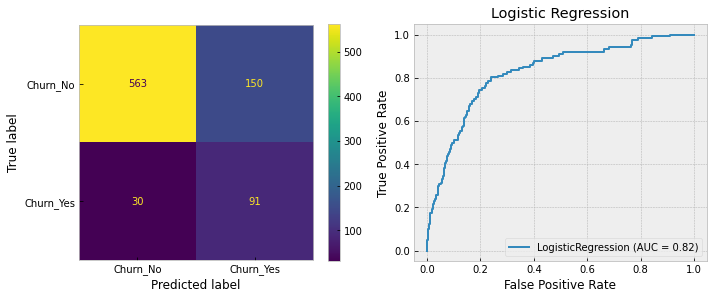

In [112]:
plotFigure(logreg_pl, xtest_lin, ytest_lin, 'LogisticRegression')
plt.title('Logistic Regression');

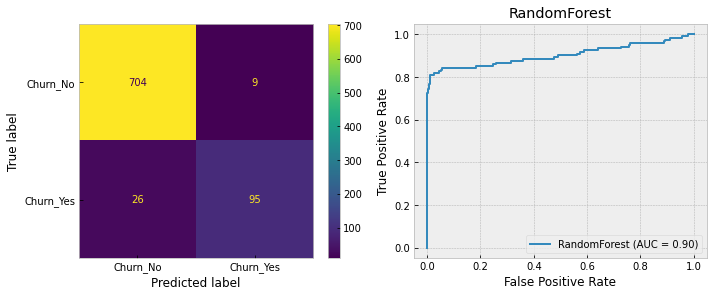

In [100]:
plotFigure(rf, xtest, ytest, 'RandomForest')
plt.title('RandomForest');

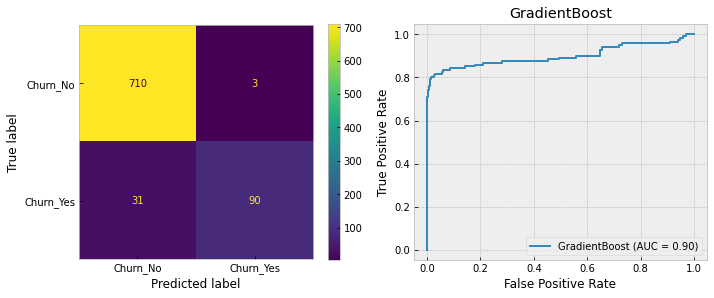

In [101]:
plotFigure(gbm, xtest, ytest, 'GradientBoost')
plt.title('GradientBoost');

<ul>
    <li>
Logistic Model could could accurately predict the positive class 75% of the time (recall), but ita ability to predict that an instance truly belongs (precision) to the positive class is poor. It is confused at differentiating customers who would churn from customers who have churned already.</li>

<li>The randomforest model did pretty well, it could accurately the positive class 79% of the time, and also could comfortably differentiate the negative class from the positive class, albeit an error of 9%.</li>

<li>The Gradient boost model also did well compared to the randomforest model. Its ability to differentiate the positive class from the negative class is very remarkable, with a 97% "effortless" work. Just like other models, it didn't do so well at accurately predicting the positive class, in fact, the logistic model did slightly better than it did.</li>
</ul>

This is so because the distribution of classes is very unfavourable -there's a class imbalance. To remedy this we could upsample the positive class, a technique known as <b>oversampling</b>, or we could introduce a much efficient class weighting approach to increase the weights of the positive class if a misclassification occurs in order to accurately predicting another instance belonging to the positive class. This technique is called <b>class weighting</b>. 

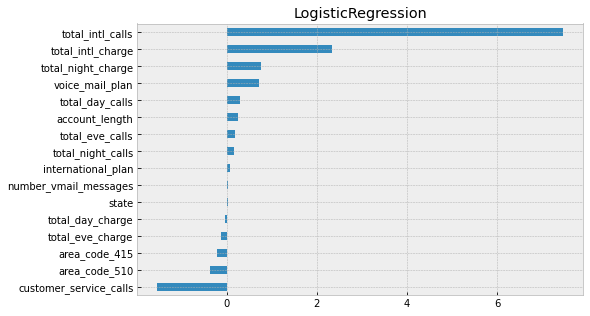

In [102]:
plt.figure(figsize=(8,5))
featureImportance(logreg_pl, xtest_lin, ytest_lin)

<b>Notes:</b><br>
The features with positive coefficients tend to push prediction to the positive class while those with negative coefficients tend to move it to the negative class.

For a customer to churn from a telecom what are the factors that could make them leave. One is the Charge they are billed for each call they make, another is the quaity of service provided by the telecom company.

So going by the coefficient plot of the logistic model, we see that one is the total international calls made, another is the total international call charges they are billed. As we all know, making an international call is quite costly than making  local call, so dependent on the rate placed by the telecom, the more the number of international calls a customer makes, the more the charges.
This tells us that customers who have an international plan, make a lot of calls, look at the amount they've been charged on those calls, if very exorbitant and if it becomes recurrent, tend to churn.

Another factor is if a customer is in a voicemail plan. It may be ideal to create another feature which is customers with both internatioal and voicemail plans.
We weren't given the voicemail charges, but i think recurrent high voicemail charges, as well as the international charges (as we've seen), should also be a factor for a customer to churn.

Looking at the customer service calls, yea, it tells us that it isn't a strong factor for churning. A good question is can customers who make a lot of calls and are charged high in their international calls, do they churn? So to answer this I think we can generate a feature that captures the interaction b/w them, since linear models do not capture interactions by themselves.

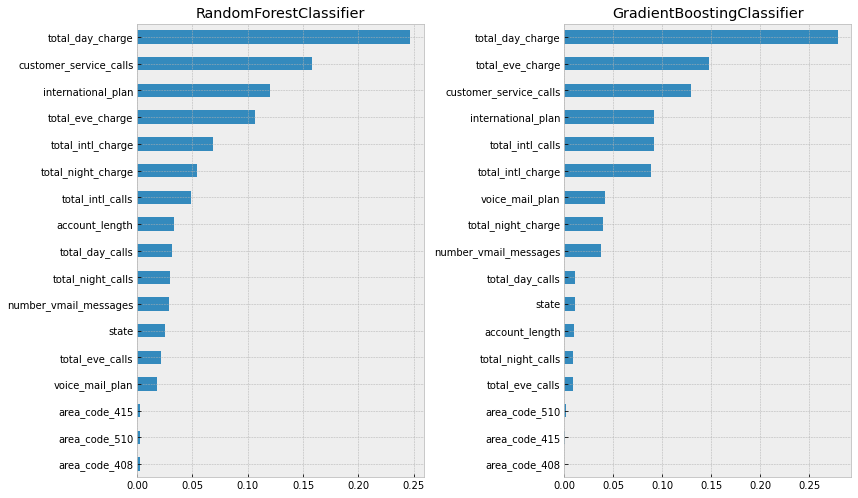

In [103]:
plt.figure(figsize=(12,7))
for i, model in enumerate([rf, gbm], start=1):
    plt.subplot(1,2,i)
    featureImportance(model, xtest, ytest)
plt.tight_layout(pad=1.)

Just like I've stated above that the amount of charges -whether day, international, evening or night- billed on a customer is a strong factor for churners. We see that again from the feature importance plot of the tree models. Other important features are the international plan.

In [104]:
gc.collect()

34480

<b>Ideas for Improvement</b>
<ul>
<li>More Feature Engineering may be done. For example, the total charges (day, eve, night charges), total calls (day, eve, night), total call minutes etc. Others could be the charge per minute paid by the customer, the number of minutes per call, and so on.</li>
<li>For Logistic Regression, a higher order polynomial could be used, or interaction features could be created.</li>
<li>Class imbalance solution techniques: Since this dataset is class unbalanced, we could use any of the techniques metioned above to see if there's an improvement.</li>
<li>One or more different models could be combined, where each utilises their strengths.
</ul>